In [2]:
import pandas as pd

fto = './data/blitz.txt' #  File to Open

df = pd.read_table(fto, sep=',', header=0, comment='*',engine='python' )

/srv/envdeploy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """


Populating the interactive namespace from numpy and matplotlib
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=440180.63198948256,5436659.306203578,481373.1777313136,5483589.770230824&bboxSR=31284&imageSR=31284&size=800,911&dpi=96&format=png32&transparent=true&f=image


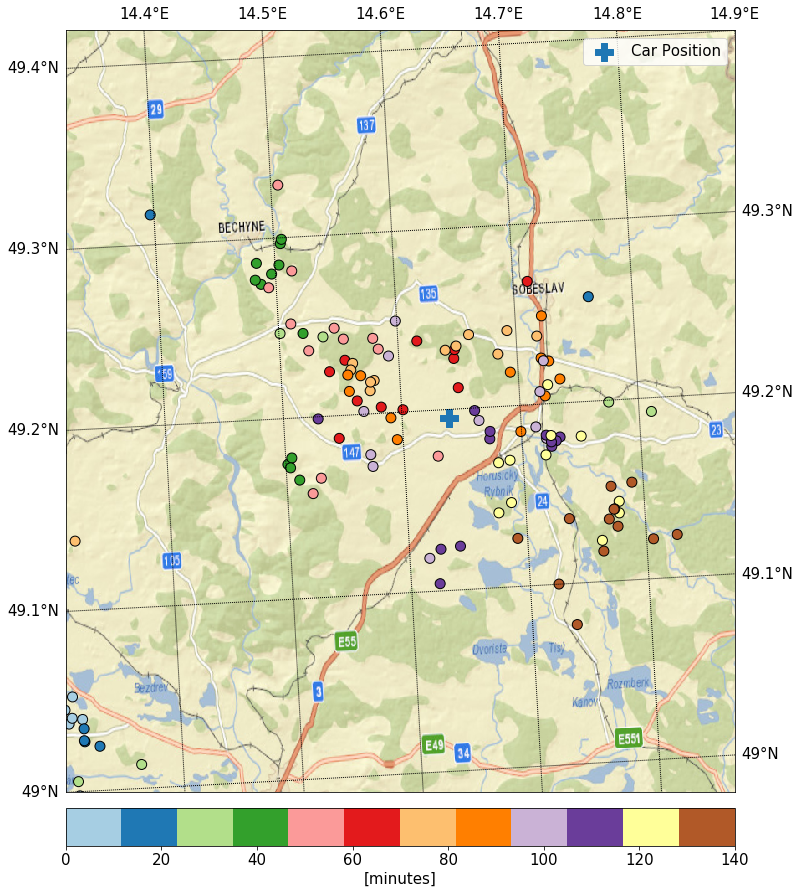

In [8]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os
%pylab inline --no-import-all

plt.figure(figsize=(15,15))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

df2=df
df2['lat'] = pd.to_numeric(df['lat'])
df2['lon'] = pd.to_numeric(df['lon'])
df2['time'] = pd.to_datetime(df['time'])

m = Basemap(llcrnrlon=14.3,llcrnrlat=49,urcrnrlon=14.9, urcrnrlat=49.4, epsg = 31284)

m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 800, verbose= True)
#m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 100, verbose= True)

x, y = m(df2.lon.tolist(),df2.lat.tolist())

m.drawparallels(np.arange(0.,99.,0.1),labels=[1,1,0,0])
m.drawmeridians(np.arange(0.,20.,0.1),labels=[0,0,1,0])

im1 = m.scatter(x,y,c=df2.index.astype(np.int64).tolist(),marker='o', cmap='Paired', edgecolor='black', s=100)
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label('[minutes]')

x, y = m( 14.639835, 49.1949915 )
im2 = m.scatter(x,y,marker='P', s=300, label='Car Position')
plt.legend(loc=1)